In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


**Trying out different summarzation models on dummy dataset** \
-The model can then be trained and fine tuned on given dataset during hackathon \
-Using Transformer Models as they are already pretrained on multiple parameters and large dataset which helps in preserving context of the complaint along with interpreting meaning of the words.

In [2]:
#Reading Dataset
df=pd.read_csv('/kaggle/input/consume-complaints-dataset-fo-nlp/complaints_processed.csv')
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


**Plotting a wordcloud of complaints**

In [8]:
def plot_wordcloud(df):    
    from wordcloud import WordCloud, STOPWORDS
    stopwords = set(STOPWORDS)
    comment_words = function(df)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    min_font_size = 10,collocations=False).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    
    
def function(train):   
    comment_words = ""
    for i in train["narrative"]:
        val = str(i)
        tokens = val.split()
        for k in range(len(tokens)):
            tokens[k] = tokens[k].lower()
        comment_words += " ".join(tokens)+" "
    return comment_words

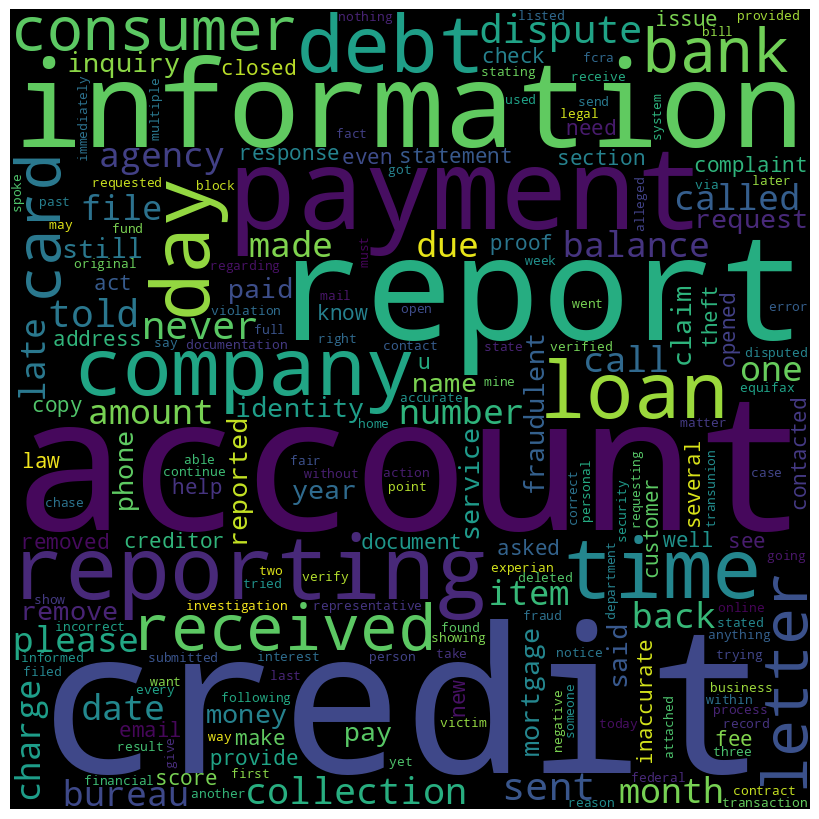

In [9]:
plot_wordcloud(df)

**Importing Pipeline from Transformer to summarize narratives**

In [10]:
from transformers import pipeline
summarizer = pipeline("summarization")


2024-03-16 12:33:49.060391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 12:33:49.060576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 12:33:49.250706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [31]:
print(df.isnull().sum())
df.dropna()#dropping null values as the number is minimal 

Unnamed: 0              0
product                 0
narrative               0
summarized_narrative    2
dtype: int64


,Unnamed: 0,product,narrative,summarized_narrative
0,0,credit_card,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pr...
1,1,credit_card,forwarded message date tue subject please inve...,Please investigate comenity bank retailer car...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,"""Well fargo clearly wrong need look actually ..."
3,3,credit_reporting,payment history missing credit report speciali...,Issue with account marked forbearance has bee...
4,4,credit_reporting,payment history missing credit report made mis...,Credit report made mistake put account forbea...
...,...,...,...,...
95,95,debt_collection,rent recovery solution extorting multiple peop...,rent recovery solution extorting multiple peo...
96,96,credit_card,see approved without impact credit got experia...,See approved without impact credit got experi...
97,97,credit_reporting,thank submitting complaint cfpb complaint port...,Complaint indicated inaccurate incorrect item...
98,98,credit_reporting,transunion continue refresh outdated account o...,transunion continue refresh outdated account ...


In [6]:
#downsampling dataset (to just see whether the output is properly summarized or not)
df=df.head(100)
df.shape

(100, 3)

Summarizing complaints to 15 words

In [24]:
#defining function to summarize all rows of narration text 
def summarize_text(text):
    try:
        input_length = len(text.split())
        max_length = min(2 * input_length, 300)
        summary = summarizer(text,max_length=max_length, min_length=15, do_sample=False)
        return summary[0]['summary_text'] 
    except Exception as e:
        print(f"Error summarizing text: {e}")
        return None
    
df['summarized_narrative'] = df['narrative'].apply(summarize_text)
print(df[['narrative', 'summarized_narrative']])

Your max_length is set to 300, but your input_length is only 267. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=133)
Your max_length is set to 264, but your input_length is only 155. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)
Your max_length is set to 300, but your input_length is only 185. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)
Your max_length is set to 262, but your input_length is only 137. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)

Error summarizing text: index out of range in self


Your max_length is set to 300, but your input_length is only 210. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=105)
Your max_length is set to 104, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 72, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 190, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Yo

Error summarizing text: index out of range in self


Your max_length is set to 76, but your input_length is only 43. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 106, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 52, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 300, but your input_length is only 251. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=125)
Your

                                            narrative  \
0   purchase order day shipping amount receive pro...   
1   forwarded message date tue subject please inve...   
2   forwarded message cc sent friday pdt subject f...   
3   payment history missing credit report speciali...   
4   payment history missing credit report made mis...   
..                                                ...   
95  rent recovery solution extorting multiple peop...   
96  see approved without impact credit got experia...   
97  thank submitting complaint cfpb complaint port...   
98  transunion continue refresh outdated account o...   
99  trueaccord emailed separated eight year regard...   

                                 summarized_narrative  
0    purchase order day shipping amount receive pr...  
1    Please investigate comenity bank retailer car...  
2    "Well fargo clearly wrong need look actually ...  
3    Issue with account marked forbearance has bee...  
4    Credit report made mistake put

/tmp/ipykernel_33/1431979782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summarized_narrative'] = df['narrative'].apply(summarize_text)


After summarization we can see almost 80% reduction in the length of text

In [36]:
#narrative before
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentence=df['narrative'][0]
tokens = word_tokenize(sentence)
print('length of tokens is:', len(tokens))
print(df['narrative'][0])

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
length of tokens is: 230
purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal sh

In [38]:
#summarized narrative
sentence2=df['summarized_narrative'][0]
tokens2 = word_tokenize(sentence2)
print('length of tokens is:', len(tokens2))
print(df['summarized_narrative'][0])


length of tokens is: 40
 purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand .


In [28]:
df

,Unnamed: 0,product,narrative,summarized_narrative
0,0,credit_card,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pr...
1,1,credit_card,forwarded message date tue subject please inve...,Please investigate comenity bank retailer car...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,"""Well fargo clearly wrong need look actually ..."
3,3,credit_reporting,payment history missing credit report speciali...,Issue with account marked forbearance has bee...
4,4,credit_reporting,payment history missing credit report made mis...,Credit report made mistake put account forbea...
...,...,...,...,...
95,95,debt_collection,rent recovery solution extorting multiple peop...,rent recovery solution extorting multiple peo...
96,96,credit_card,see approved without impact credit got experia...,See approved without impact credit got experi...
97,97,credit_reporting,thank submitting complaint cfpb complaint port...,Complaint indicated inaccurate incorrect item...
98,98,credit_reporting,transunion continue refresh outdated account o...,transunion continue refresh outdated account ...


In [3]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


2024-03-17 06:30:38.287444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 06:30:38.287655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 06:30:38.443506: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'summary_text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.'}]


**Trying out BART Transformer for Summarization**

In [9]:
df2=df.head(50)
def summarize_text_using_BART(text):
    try:
        input_length = len(text.split())
        max_length = min(2 * input_length, 300)
        summary = summarizer(text,max_length=max_length, min_length=15, do_sample=False)
        return summary[0]['summary_text'] 
    except Exception as e:
        print(f"Error summarizing text: {e}")
        return None
    
df2['summarized_narrative_using_BART'] = df2['narrative'].apply(summarize_text_using_BART)
print(df2[['narrative', 'summarized_narrative_using_BART']])

Your max_length is set to 300, but your input_length is only 267. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=133)
Your max_length is set to 264, but your input_length is only 155. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)
Your max_length is set to 300, but your input_length is only 185. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)
Your max_length is set to 262, but your input_length is only 137. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)

Error summarizing text: index out of range in self


Your max_length is set to 300, but your input_length is only 210. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=105)


                                            narrative  \
0   purchase order day shipping amount receive pro...   
1   forwarded message date tue subject please inve...   
2   forwarded message cc sent friday pdt subject f...   
3   payment history missing credit report speciali...   
4   payment history missing credit report made mis...   
5   payment history missing credit report made mis...   
6   va date complaint experian credit bureau invol...   
7   account reported abbreviated name full name se...   
8   account reported abbreviated name full name se...   
9   usdoexxxx account reported abbreviated name fu...   
10  beginning mortgage held mb financial mb mortga...   
11  called request new york state covid relief pla...   
12  capital one secured credit account opened name...   
13  collection account acct opened balance account...   
14  collection agency system inc mn phone sent let...   
15  current loan provident funding applied refinan...   
16  current loan got deferment 

/tmp/ipykernel_33/883643529.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['summarized_narrative_using_BART'] = df2['narrative'].apply(summarize_text_using_BART)


In [14]:
print('Example Complaint\n')
print(df2['narrative'][0])
print('\n')
print('Summarized complaint using Bart\n')
print(df2['summarized_narrative_using_BART'][0])

Example Complaint

purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged ite

TypeError: object of type 'NoneType' has no len()

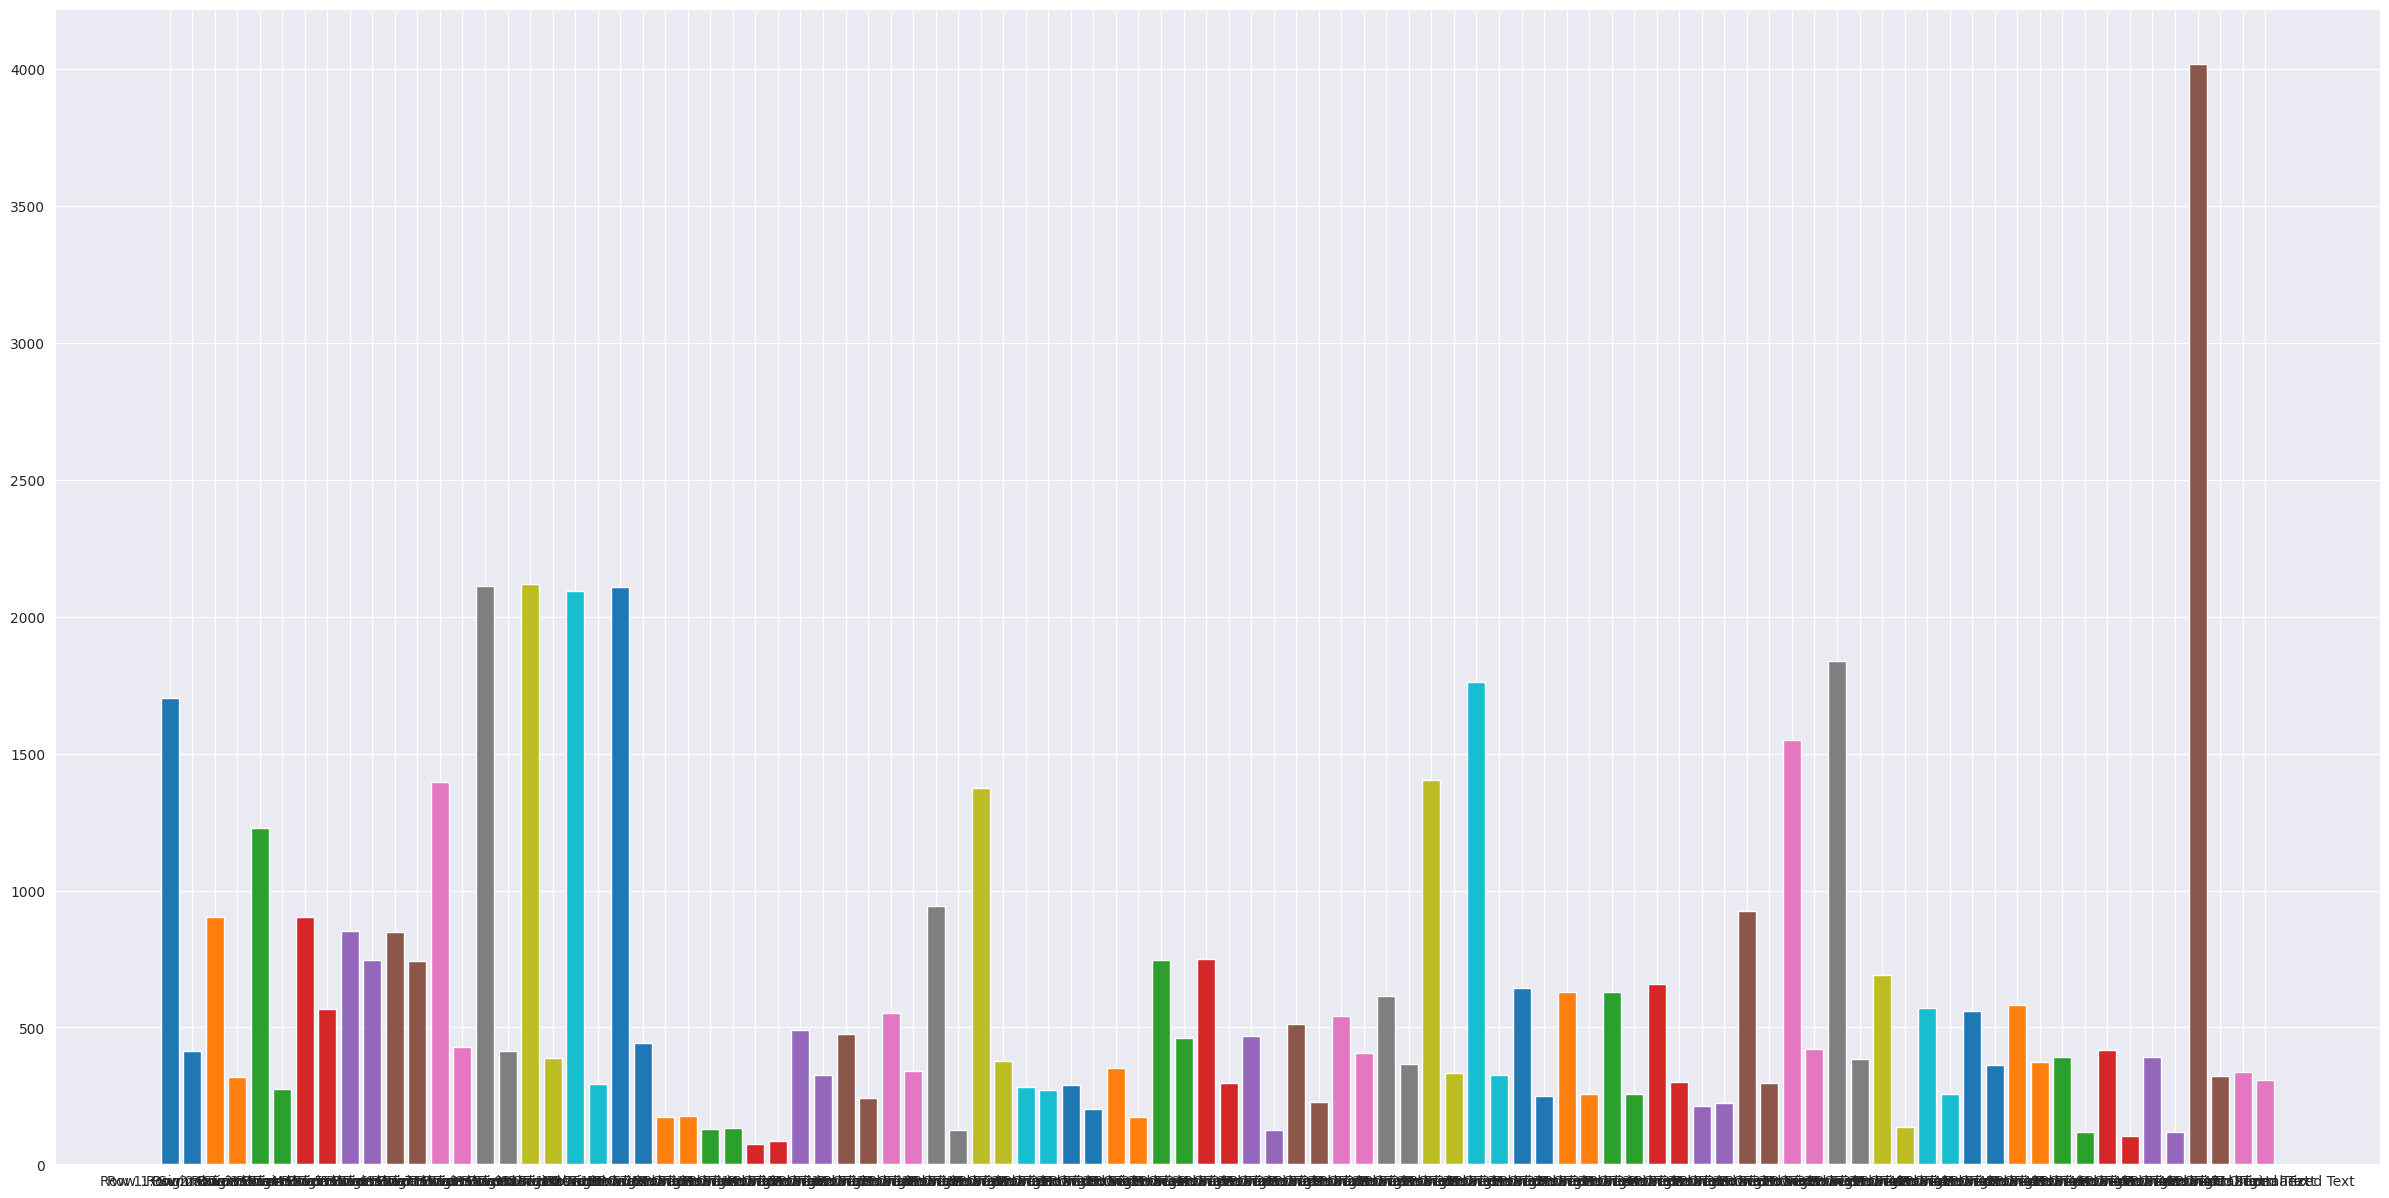

In [19]:
plt.figure(figsize=(30, 15))
for index, row in df2.iterrows():
    plt.bar([f'Row {index+1}: Original Text', f'Row {index+1}: Summarized Text'], 
            [len(row['narrative']), len(row['summarized_narrative_using_BART'])])
plt.xlabel('Text Type')
plt.ylabel('Length')
plt.title('Comparison of Lengths: Original vs. Summarized Text')
plt.xticks(rotation=45)
plt.show()